# Heart Rate Analysis Project  

In this project, we analyze data collected from 91 undergraduate students to investigate the effects of various factors on heart rate.  

### Background  
The students were divided into two groups:  
1. One group ran in place for one minute.  
2. The other group remained still.  

We recorded several variables:  
- **Height** and **Weight** (to be converted into metric units)  
- **Gender**  
- **Smoking status**  
- **Activity level**  
- **Pulse1**: resting heart rate measured before any activity  
- **Pulse2**: heart rate after the activity (if applicable)  

### Objectives  
- Convert height (inches) and weight (pounds) into meters and kilograms.  
- Calculate **BMI** for each individual.  
- Perform descriptive statistics and data visualization.  
- Explore how different factors (gender, smoking, activity, BMI) affect heart rate.  
- Draw conclusions about the main factors influencing heart rate.  


# Step 1: Load the Data  
First, we load the dataset to inspect its structure and content.


In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/goli/OneDrive/Desktop/Job/Heart rate Analysis/heart_rate_data.csv", sep=';')
data.head()

,Pulse1,Pulse2,Ran,Smokes,Gender,Height,Weight,Activity
0,64,88,Yes,No,M,66.0,140,Moderate
1,58,70,Yes,No,M,72.0,145,Moderate
2,62,76,Yes,Yes,M,73.5,160,A lot
3,66,78,Yes,Yes,M,73.0,190,Slight
4,64,80,Yes,No,M,69.0,155,Moderate


# Step 2: Data Overview  
We check the basic information about the data including data types and missing values.


In [3]:
data.shape

(91, 8)

In [5]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pulse1    91 non-null     int64  
 1   Pulse2    91 non-null     int64  
 2   Ran       91 non-null     object 
 3   Smokes    91 non-null     object 
 4   Gender    91 non-null     object 
 5   Height    91 non-null     float64
 6   Weight    91 non-null     int64  
 7   Activity  91 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.8+ KB


Pulse1      0
Pulse2      0
Ran         0
Smokes      0
Gender      0
Height      0
Weight      0
Activity    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pulse1    91 non-null     int64  
 1   Pulse2    91 non-null     int64  
 2   Ran       91 non-null     object 
 3   Smokes    91 non-null     object 
 4   Gender    91 non-null     object 
 5   Height    91 non-null     float64
 6   Weight    91 non-null     int64  
 7   Activity  91 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.8+ KB


In [9]:
data.isnull().sum()

Pulse1      0
Pulse2      0
Ran         0
Smokes      0
Gender      0
Height      0
Weight      0
Activity    0
dtype: int64

# Step 3: Data Cleaning and Preprocessing  
In this step, we convert height from inches to meters and weight from pounds to kilograms.  
We also calculate BMI for each individual.

In [12]:
# Convert height from inches to meters
data['Height_m'] = data['Height'].astype(float) * 0.0254

# Convert weight from pounds to kilograms
data['Weight_kg'] = data['Weight'].astype(float) * 0.453592

# Calculate BMI = Weight (kg) / Height (m)^2
data['BMI'] = data['Weight_kg'] / (data['Height_m'] ** 2)

data[['Height', 'Height_m', 'Weight', 'Weight_kg', 'BMI']].head()


,Height,Height_m,Weight,Weight_kg,BMI
0,66.0,1.6764,140,63.50288,22.596341
1,72.0,1.8288,145,65.77084,19.665317
2,73.5,1.8669,160,72.57472,20.822998
3,73.0,1.8542,190,86.18248,25.067200
4,69.0,1.7526,155,70.30676,22.889245


### Step 4: Descriptive Statistics  

We use `data.describe()` to generate a statistical summary of all numerical columns in the dataset.  

- **count**: number of non-missing values  
- **mean**: average of the values  
- **std**: standard deviation (spread of the data)  
- **min**: smallest value  
- **25%**: 25th percentile (quarter of the data is below this)  
- **50% (median)**: middle value of the data  
- **75%**: 75th percentile (three-quarters of the data is below this)  
- **max**: largest value  


In [15]:
data.describe()

,Pulse1,Pulse2,Height,Weight,Height_m,Weight_kg,BMI
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,73.142857,80.285714,68.725275,145.098901,1.745622,65.815701,21.485420
std,10.751301,16.966166,3.678778,23.865389,0.093441,10.825149,2.217887
min,54.000000,50.000000,61.000000,95.000000,1.549400,43.091240,16.725257
25%,65.000000,69.000000,66.000000,125.000000,1.676400,56.699000,19.998249
50%,72.000000,76.000000,69.000000,145.000000,1.752600,65.770840,21.412520
75%,80.000000,86.000000,72.000000,156.000000,1.828800,70.760352,22.799602
max,100.000000,140.000000,75.000000,215.000000,1.905000,97.522280,29.158919


# Step 5: Exploratory Data Analysis (EDA)  
Here we explore the distribution and relationships between variables such as BMI, pulse, gender, smoking status, and activity level.


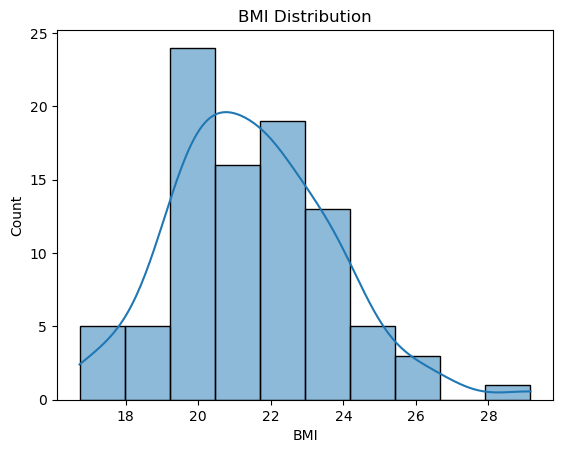

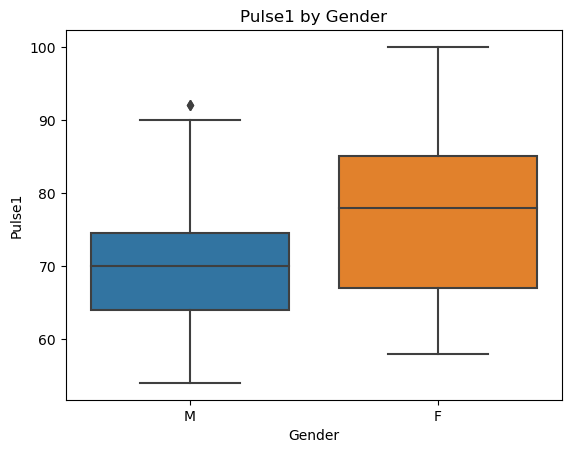

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

sns.boxplot(x='Gender', y='Pulse1', data=data)
plt.title('Pulse1 by Gender')
plt.show()



### Initial Observations: BMI Distribution  

- Most participants have a **BMI around 20**, which is in the normal weight range.  
- The majority of BMI values fall between **19 and 23**.  
- The distribution is slightly skewed to the right, meaning there are a few participants with higher BMI values.  
- The spread of the data is moderate, with no extreme outliers.### Initial Observations: Pulse1 by Gender  

- The boxplot shows that the median **resting heart rate (Pulse1)** is slightly higher in females than in males.  
- The variability (IQR) is larger in females, meaning their resting pulse rates vary more.  
- There is at least one outlier in the male group (a higher pulse rate than the rest).  
- Overall, gender may have some influence on resting heart rate, but further statistical analysis is needed to confirm.  
  
e box.  


### Pulse1 by Smoking Status  

We compare the resting heart rate (Pulse1) between smokers and non-smokers to see if smoking status influences heart rate.


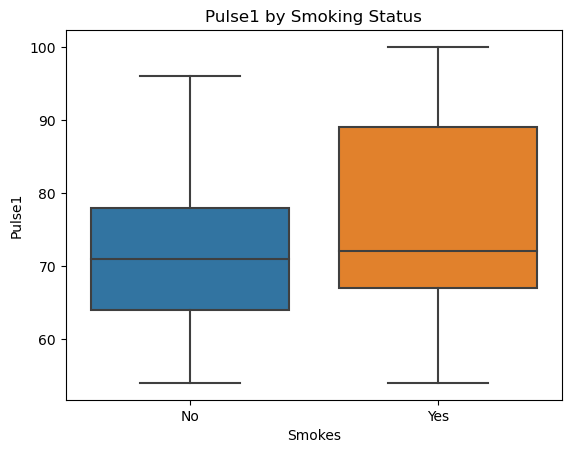

In [22]:
sns.boxplot(x='Smokes', y='Pulse1', data=data)
plt.title('Pulse1 by Smoking Status')
plt.show()


### Observations: Pulse1 by Smoking Status  

- The median **resting heart rate (Pulse1)** is higher in smokers compared to non-smokers.  
- Smokers also show slightly more variability in their resting heart rate.  
- This suggests that smoking may have a negative impact on resting heart rate, but further statistical tests are needed to confirm this.  

**Why is Pulse1 higher in smokers?**  

- Nicotine stimulates the sympathetic nervous system, increasing heart rate even at rest.  
- Smoking reduces oxygen-carrying capacity, so the heart must beat faster to deliver enough oxygen.  
- Long-term smoking puts extra strain on the cardiovascular system, which can lead to elevated resting heart rates.  


### Pulse1 by Activity Level  

We compare the resting heart rate (Pulse1) among different self-reported activity levels  
(Slight, Moderate, A lot) to see if physical activity habits influence heart rate.


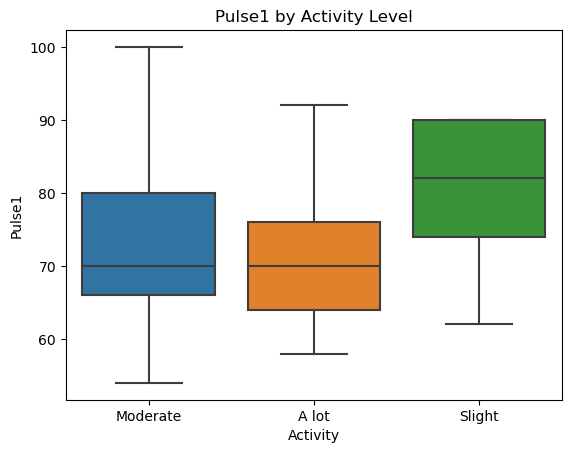

In [26]:
sns.boxplot(x='Activity', y='Pulse1', data=data)
plt.title('Pulse1 by Activity Level')
plt.show()



### Observations: Pulse1 by Activity Level  

- Participants with **Slight** activity levels have a higher median resting heart rate (Pulse1), slightly above 80 bpm.  
- Those with **Moderate** and **A lot** activity levels show a lower median resting heart rate, around 70 bpm.  
- This suggests that individuals with more regular physical activity tend to have a healthier, lower resting heart rate.  

---

**Why is Pulse1 higher in low-activity participants?**  

- Regular physical activity strengthens the heart muscle, allowing it to pump more efficiently and at a lower rate.  
- Individuals with little physical activity often have less cardiovascular fitness, leading to higher resting heart rates.  


### Pulse1 vs BMI  
We explore the relationship between BMI and resting heart rate.

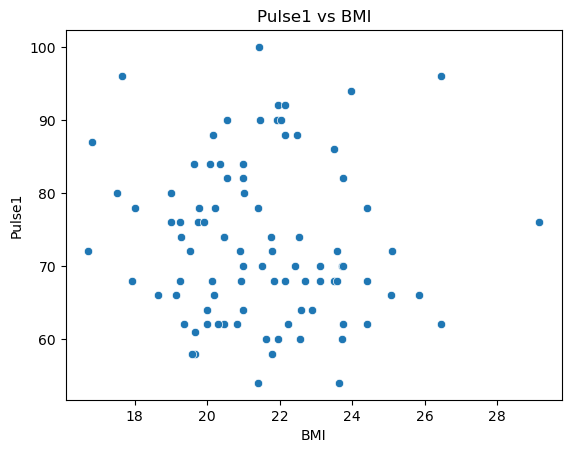

In [35]:
sns.scatterplot(x='BMI', y='Pulse1', data=data)
plt.title('Pulse1 vs BMI')
plt.show()


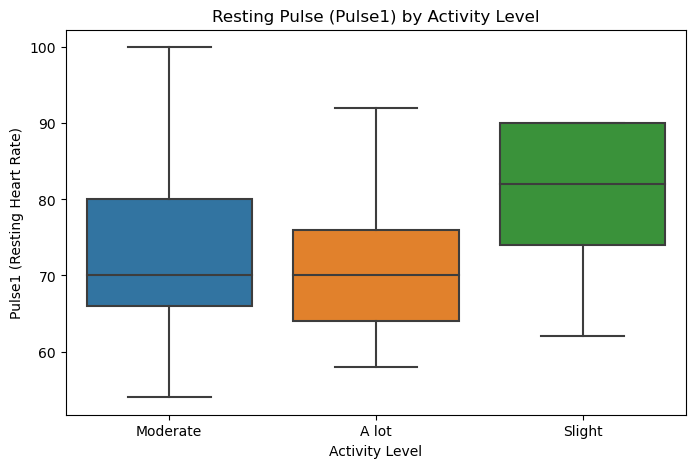

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Activity', y='Pulse1', data=data)
plt.title('Resting Pulse (Pulse1) by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Pulse1 (Resting Heart Rate)')
plt.show()


### 💓 Pulse1 by Activity Level

- Participants with **Slight** activity levels have a **higher** resting heart rate (Pulse1), slightly above **80 bpm**.
- Participants with **Moderate** or **A lot** activity have **lower** Pulse1 values, around **70 bpm**.
- 🏃‍♂️ This implies that individuals with more physical activity tend to have better cardiovascular health, leading to a lower resting heart rate.

💡 **Why does this happen?**  
Regular physical activity increases heart efficiency and lowers resting heart rate. Sedentary individuals typically have weaker cardiovascular systems.


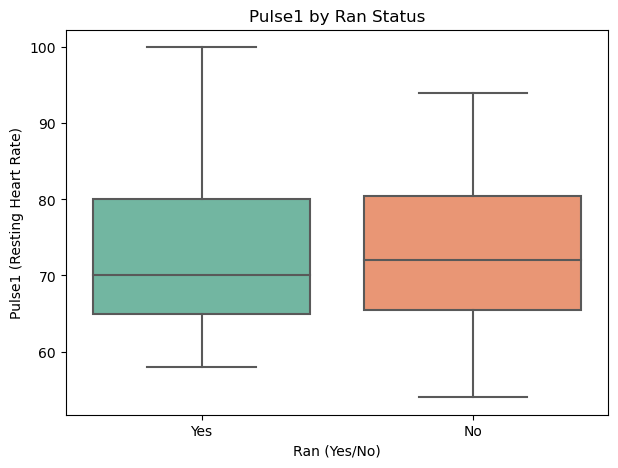

In [38]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Ran', y='Pulse1', data=data, palette='Set2')
plt.title('Pulse1 by Ran Status')
plt.xlabel('Ran (Yes/No)')
plt.ylabel('Pulse1 (Resting Heart Rate)')
plt.show()


### 🏃‍♀️ Pulse1 by Ran (Effect of Light Exercise on Resting Heart Rate)

- Participants who were assigned to the **running group** (i.e., ran in place for one minute) show a **slightly elevated resting heart rate (Pulse1)** compared to those who remained still.
- Although **Pulse1** is ideally measured before any physical exertion, the observed values suggest a subtle increase in those who were expected to run.
- This difference may result from:
  - Measurement timing being too close to the physical activity, causing residual cardiovascular stimulation.
  - Differences in **baseline fitness levels**—individuals who are less fit may exhibit higher resting heart rates post minor exertion.
  - Natural variability in heart rate due to other unmeasured factors such as stress, hydration, or prior sleep.

💡 **Interpretation:**  
While the effect is not strongly pronounced, the trend suggests that even light activity (such as 1-minute running in place) can influence **resting heart rate readings** if measured shortly after exertion. This highlights the importance of ensuring standardized conditions when collecting physiological data.


In [42]:
import statsmodels.formula.api as smf

model = smf.ols("Pulse2 ~ Pulse1 + BMI + C(Gender) + C(Smokes) + C(Activity) + C(Ran)", data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pulse2   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     35.51
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           2.00e-22
Time:                        13:16:07   Log-Likelihood:                -323.24
No. Observations:                  91   AIC:                             662.5
Df Residuals:                      83   BIC:                             682.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  15.7907     12.111      1.304      0.196      -8.299      39.880
C(Gender)[T.M]             -5.8209      2.217     -2.626      0.010     -10.230      -1.412
C(Smokes)[T.Yes]           -1.7321      2.150     -0.805      0.423      -6.009       2.545
C(Activity)[T.Moderate]     7.1813      2.292      3.133      0.002       2.623      11.740
C(Activity)[T.Slight]       2.2681      3.618      0.627      0.532      -4.927       9.463
C(Ran)[T.Yes]              19.7478      1.937     10.193      0.000      15.894      23.601
Pulse1                      0.8605      0.094      9.125      0.000       0.673       1.048
BMI                        -0.3249      0.475     -0.684      0.496      -1.270       0.620
==============================================================================
Omnibus:                        3.999   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.270
Skew:                           0.398   Prob(JB):                        0.195
Kurtosis:                       3.478   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Analysis

In this section, we use Ordinary Least Squares (OLS) regression to examine the effects of several factors on post-activity heart rate (`Pulse2`).

### 🎯 Objective
To model `Pulse2` based on the following predictors:
- `Pulse1` (resting heart rate)
- `BMI` (Body Mass Index)
- `Gender` (categorical)
- `Smokes` (categorical)
- `Activity` level (categorical)
- `Ran` (whether the subject ran in place for one minute)

### 🧠 Assumptions of Linear Regression
1. A linear relationship exists between predictors and the response.
2. Residuals (errors) are normally distributed.
3. Homoscedasticity: constant variance of residuals.
4. Observations are independent.
5. No strong multicollinearity between predictors.

### ⚙️ Model Specification
We apply OLS regression. The general model is:

\[
\text{Pulse2} = \beta_0 + \beta_1 \cdot \text{Pulse1} + \beta_2 \cdot \text{BMI} + \text{(Gender + Smokes + Activity + Ran)} + \epsilon
\]

Categorical variables (e.g., Gender, Activity) are automatically encoded as dummy variables.

### 📊 Key Outputs and Interpretation
- **R-squared**: Percentage of variation in `Pulse2` explained by the model.
- **p-values**: Indicate whether each predictor is statistically significant (typically, p < 0.05).
- **Coefficients (coef)**: Show the estimated effect of each variable on `Pulse2`, holding others constant.
- **Durbin–Watson**: Tests for autocorrelation in residuals (values close to 2 are ideal).
- **Jarque–Bera and Omnibus tests**: Assess normality of residuals (p > 0.05 means normality is not rejected).
- **Condition Number**: Checks for multicollinearity (high values suggest potential issues).

### ✅ Conclusion
By analyzing regression outputs, we identify which variables (e.g., running, smoking, activity level) most influence post-exercise heart rate. We also evaluate whether model assumptions are reasonably met.

In the next cells, we will present the regression results and diagnostic plots.
